In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-stock-data-from-moneycontrol/stock_data_0.json


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
raw_data= pd.read_json("/kaggle/input/indian-stock-data-from-moneycontrol/stock_data_0.json")

In [4]:
df = raw_data.copy()
df_early = raw_data.copy()

In [5]:
df.head(5)

,NAME,TYPE,COST,STRENGTH,WEAKNESS,OPPORTUNITIES,THREATS,P_LOW,P_HIGH,YEARLY_LOW,YEARLY_HIGH
0,A & M Febcon Ltd.,Miscellaneous,0.95,Company with Zero Promoter Pledge,Low Piotroski Score : Companies with weak fina...,Positive Breakout First Resistance ( LTP > R1),No Threat for this stock,0.87,0.95,0.85,2.36
1,A F Enterprises Ltd.,Finance - Investment,5.55,Growth in Net Profit with increasing Profit Ma...,Inefficient use of shareholder funds - ROE dec...,Turnaround companies- loss to profit QoQ,No Threat for this stock,5.21,5.70,4.30,23.25
2,A and M Jumbo Bags Ltd.,Containers & Packaging,NaN,Company with Zero Promoter Pledge,Inefficient use of capital to generate profits...,Highest Recovery from 52 Week Low,No Threat for this stock,NaN,NaN,NaN,NaN
3,A G Universal Ltd.,Trading,NaN,Annual Net Profits improving for last 2 years,Companies with High Debt,Highest Recovery from 52 Week Low,No Threat for this stock,0.00,0.00,32.50,119.95
4,A K Spintex Ltd.,Textiles & Apparel,138.00,"Strong Momentum: Price above short, medium and...",Decline in Net Profit with falling Profit Marg...,Stock with Low PE (PE < = 10),No Threat for this stock,131.05,138.45,72.25,162.00


In [6]:
df.shape

(9543, 11)

In [7]:
print(df.isnull().sum())

NAME                0
TYPE             3289
COST             4320
STRENGTH            0
WEAKNESS            0
OPPORTUNITIES       0
THREATS             0
P_LOW            3246
P_HIGH           3246
YEARLY_LOW       3297
YEARLY_HIGH      3297
dtype: int64


In [8]:
type_unique = df['TYPE'].unique()[:29]
print(type_unique)

['Miscellaneous' 'Finance - Investment' 'Containers & Packaging' 'Trading'
 'Textiles & Apparel' 'Infrastructure' 'Cement' None 'Software'
 'Finance - Leasing & Hire Purchase' 'Speciality Chemicals'
 'other agriculture products' 'Auto Ancillaries - Bus Body'
 'Finance - NBFC' 'Finance - Stock Broking' 'Food & Drug Retailing'
 'Household & Personal Products' 'Medical Equipment/Supplies/Accessories'
 'Consumer Food' 'Retailing' 'Engineering - Industrial Equipments'
 'Fertilizers' 'Packaging' 'Diversified' 'Vegetable Oils & Products'
 'Pharmaceuticals & Drugs' 'Dyes & Pigments' 'Paints'
 'Aerospace & Defence']


In [9]:
df.dropna(subset=['P_LOW'],inplace=True)

In [10]:
print(df.isnull().sum())

NAME                0
TYPE              111
COST             1076
STRENGTH            0
WEAKNESS            0
OPPORTUNITIES       0
THREATS             0
P_LOW               0
P_HIGH              0
YEARLY_LOW         51
YEARLY_HIGH        51
dtype: int64


In [11]:
df.dropna(subset=['YEARLY_LOW'],inplace=True)

In [12]:
print(df.isnull().sum())

NAME                0
TYPE               78
COST             1067
STRENGTH            0
WEAKNESS            0
OPPORTUNITIES       0
THREATS             0
P_LOW               0
P_HIGH              0
YEARLY_LOW          0
YEARLY_HIGH         0
dtype: int64


In [13]:
df['TYPE'].fillna(df['TYPE'].mode()[0], inplace=True)

/tmp/ipykernel_18/940080512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TYPE'].fillna(df['TYPE'].mode()[0], inplace=True)


In [14]:
df.dropna(subset=['COST'],inplace=True)

In [15]:
print(df.isnull().sum())

NAME             0
TYPE             0
COST             0
STRENGTH         0
WEAKNESS         0
OPPORTUNITIES    0
THREATS          0
P_LOW            0
P_HIGH           0
YEARLY_LOW       0
YEARLY_HIGH      0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5179 entries, 0 to 9542
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           5179 non-null   object 
 1   TYPE           5179 non-null   object 
 2   COST           5179 non-null   float64
 3   STRENGTH       5179 non-null   object 
 4   WEAKNESS       5179 non-null   object 
 5   OPPORTUNITIES  5179 non-null   object 
 6   THREATS        5179 non-null   object 
 7   P_LOW          5179 non-null   float64
 8   P_HIGH         5179 non-null   float64
 9   YEARLY_LOW     5179 non-null   float64
 10  YEARLY_HIGH    5179 non-null   float64
dtypes: float64(5), object(6)
memory usage: 485.5+ KB


In [17]:
label_en = LabelEncoder()
df['TYPE'] = label_en.fit_transform(df['TYPE'])

In [18]:
df['WEAKNESS'] = label_en.fit_transform(df['WEAKNESS'])
df['STRENGTH'] = label_en.fit_transform(df['STRENGTH'])
df['OPPORTUNITIES'] = label_en.fit_transform(df['OPPORTUNITIES'])
df['THREATS'] = label_en.fit_transform(df['THREATS'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5179 entries, 0 to 9542
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           5179 non-null   object 
 1   TYPE           5179 non-null   int64  
 2   COST           5179 non-null   float64
 3   STRENGTH       5179 non-null   int64  
 4   WEAKNESS       5179 non-null   int64  
 5   OPPORTUNITIES  5179 non-null   int64  
 6   THREATS        5179 non-null   int64  
 7   P_LOW          5179 non-null   float64
 8   P_HIGH         5179 non-null   float64
 9   YEARLY_LOW     5179 non-null   float64
 10  YEARLY_HIGH    5179 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 485.5+ KB


In [20]:
df1 = df.copy(deep=True)

In [21]:
df1.drop(['NAME'],axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5179 entries, 0 to 9542
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TYPE           5179 non-null   int64  
 1   COST           5179 non-null   float64
 2   STRENGTH       5179 non-null   int64  
 3   WEAKNESS       5179 non-null   int64  
 4   OPPORTUNITIES  5179 non-null   int64  
 5   THREATS        5179 non-null   int64  
 6   P_LOW          5179 non-null   float64
 7   P_HIGH         5179 non-null   float64
 8   YEARLY_LOW     5179 non-null   float64
 9   YEARLY_HIGH    5179 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 445.1 KB


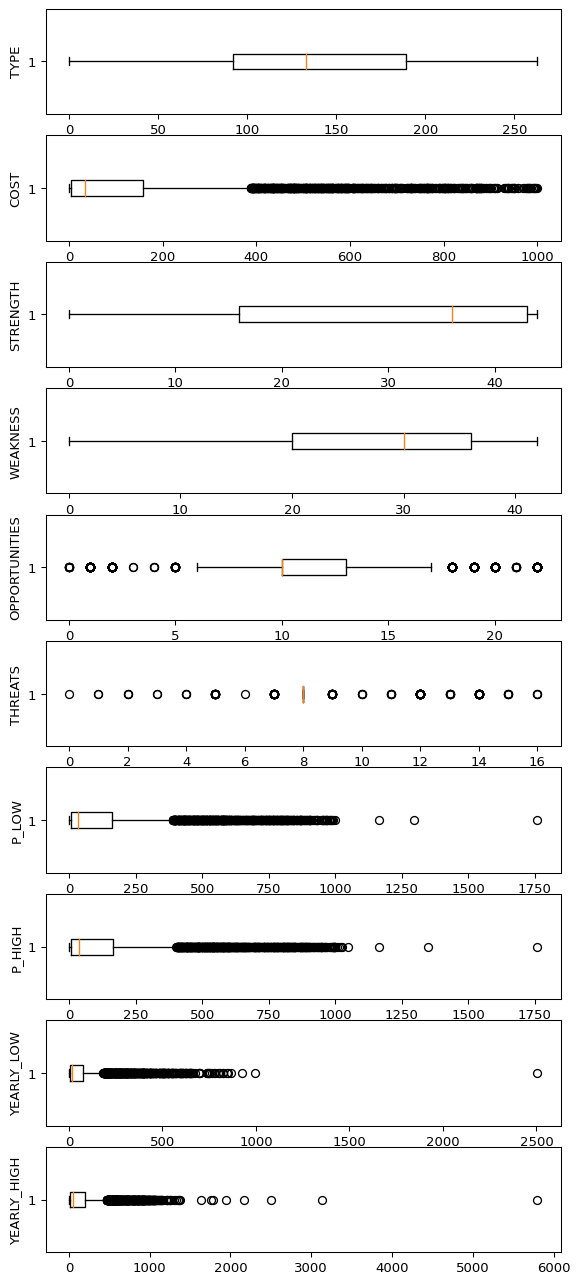

In [22]:
fig, axs = plt.subplots(10,1,dpi=95, figsize=(7,17))
i = 0
for col in df1.columns:
    axs[i].boxplot(df1[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [23]:
corr = df1.corr()
print(corr)

                   TYPE      COST  STRENGTH  WEAKNESS  OPPORTUNITIES  \
TYPE           1.000000 -0.086102 -0.049528 -0.012212       0.063886   
COST          -0.086102  1.000000 -0.048950 -0.146925      -0.147622   
STRENGTH      -0.049528 -0.048950  1.000000  0.044273      -0.039556   
WEAKNESS      -0.012212 -0.146925  0.044273  1.000000      -0.038552   
OPPORTUNITIES  0.063886 -0.147622 -0.039556 -0.038552       1.000000   
THREATS        0.009483  0.026826  0.002102 -0.005694       0.031692   
P_LOW         -0.086279  0.979115 -0.049438 -0.141219      -0.150307   
P_HIGH        -0.085034  0.979497 -0.047002 -0.141600      -0.149245   
YEARLY_LOW    -0.075169  0.853229 -0.105037 -0.109834      -0.098780   
YEARLY_HIGH   -0.069875  0.897649 -0.085130 -0.123133      -0.127317   

                THREATS     P_LOW    P_HIGH  YEARLY_LOW  YEARLY_HIGH  
TYPE           0.009483 -0.086279 -0.085034   -0.075169    -0.069875  
COST           0.026826  0.979115  0.979497    0.853229     0.897

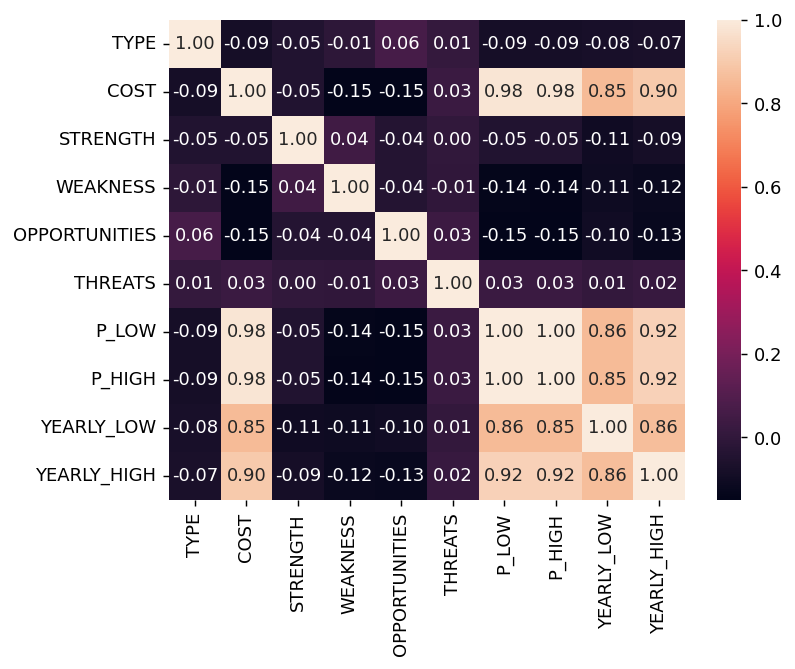

In [24]:
plt.figure(dpi=130)
sns.heatmap(df1.corr(), annot =True, fmt= '.2f' )
plt.show()

In [25]:
print("********Unclean Data******** \n", df_early.head(5))
print("\n \n \n********Clean Data********* \n",df1.head(5))


********Unclean Data******** 
                       NAME                    TYPE    COST  \
0        A & M Febcon Ltd.           Miscellaneous    0.95   
1     A F Enterprises Ltd.    Finance - Investment    5.55   
2  A and M Jumbo Bags Ltd.  Containers & Packaging     NaN   
3       A G Universal Ltd.                 Trading     NaN   
4         A K Spintex Ltd.      Textiles & Apparel  138.00   

                                            STRENGTH  \
0                  Company with Zero Promoter Pledge   
1  Growth in Net Profit with increasing Profit Ma...   
2                  Company with Zero Promoter Pledge   
3      Annual Net Profits improving for last 2 years   
4  Strong Momentum: Price above short, medium and...   

                                            WEAKNESS  \
0  Low Piotroski Score : Companies with weak fina...   
1  Inefficient use of shareholder funds - ROE dec...   
2  Inefficient use of capital to generate profits...   
3                           Compani

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [27]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [28]:
X = df1.drop('YEARLY_LOW', axis=1)
y = df1['YEARLY_LOW']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# regr_1.fit(X, y)
# regr_2.fit(X, y)
clf = DecisionTreeRegressor()
clf.fit(X, y)

DecisionTreeRegressor()

[Text(0.7868757527623899, 0.9827586206896551, 'x[8] <= 409.1\nsquared_error = 16972.615\nsamples = 5179\nvalue = 72.463'),
 Text(0.6336011721100593, 0.9482758620689655, 'x[8] <= 166.275\nsquared_error = 2238.808\nsamples = 4463\nvalue = 32.239'),
 Text(0.48238366340715766, 0.9137931034482759, 'x[6] <= 46.01\nsquared_error = 428.231\nsamples = 3725\nvalue = 16.483'),
 Text(0.32760374548746224, 0.8793103448275862, 'x[8] <= 22.095\nsquared_error = 74.348\nsamples = 2784\nvalue = 7.483'),
 Text(0.20903703128724901, 0.8448275862068966, 'x[8] <= 10.335\nsquared_error = 10.329\nsamples = 1833\nvalue = 3.28'),
 Text(0.1367099123710944, 0.8103448275862069, 'x[6] <= 3.42\nsquared_error = 3.685\nsamples = 1279\nvalue = 1.9'),
 Text(0.07475636741850396, 0.7758620689655172, 'x[8] <= 2.99\nsquared_error = 1.852\nsamples = 874\nvalue = 1.146'),
 Text(0.04240302759983697, 0.7413793103448276, 'x[6] <= 0.985\nsquared_error = 0.242\nsamples = 489\nvalue = 0.601'),
 Text(0.014867499250213401, 0.7068965517

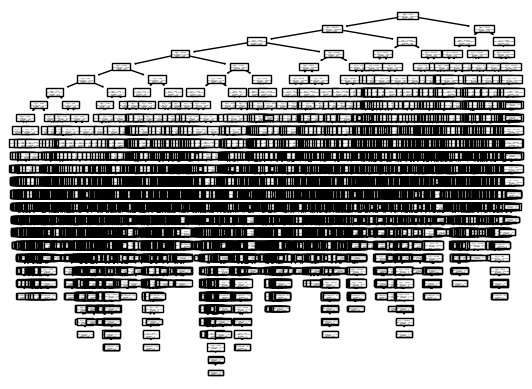

In [31]:
tree.plot_tree(clf)
